# t-SNE

In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.cluster import SpectralCoclustering
from sklearn.metrics import consensus_score

In [2]:
# data = np.random.choice(2, size=(40, 20))

In [3]:
# data

In [4]:
np.identity(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [5]:
shape = (40, 40)
x = np.tril(np.full(shape, 1), -1) + np.triu(np.full(shape, 0), 1)

In [6]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 1, 0]])

In [7]:
df = pd.read_csv('Story_Classification_Data.csv')

In [8]:
df

,Genre,Longform Infographic,Dynamic Slideshow,Multimedia Visual Experience,Communicating Narrative and Explaining Data,Textual Narrative,Audio Narration,Labeling,Text Annotations on Visualizations,Tooltips,...,Multiple Coordinated Views,Animation or Slideshow,Layer Superimposition,Layer Juxtaposition,Title,Year,Source,Theme,Authors,Link
0,1,1.0,NaN,NaN,1,1,NaN,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,America is more diverse than ever — but still ...,2018,Washington Post,Society & Health,Aaron Williams and Armand Emamdjomeh,https://www.washingtonpost.com/graphics/2018/n...
1,1,1.0,NaN,NaN,1,1,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,The daily commute: travel times to cities arou...,2018,The Guardian,Society & Health,Ammar Kalia,https://www.theguardian.com/cities/gallery/201...
2,1,NaN,1.0,NaN,1,1,NaN,1.0,0.0,NaN,...,1.0,1.0,NaN,NaN,Manhattan Population Explorer,2018,Manpopex,Society & Health,"Fung, J.",https://manpopex.us/
3,1,1.0,NaN,NaN,1,1,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,Streetscapes,2018,Zeit online,Society & Health,"Kai Biermann, Paul Blickle, Astrid Geisler, Fl...",https://www.zeit.de/feature/streetdirectory-st...
4,1,1.0,NaN,NaN,1,1,NaN,1.0,NaN,1.0,...,1.0,1.0,1.0,NaN,Alt- oder Neubau? So wohnt Berlin,2018,Berliner Morgenpost,Society & Health,"Marie-Louise Timcke, André Pätzold, David Wend...",https://interaktiv.morgenpost.de/so-alt-wohnt-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,1,NaN,NaN,1.0,1,1,1.0,1.0,1.0,NaN,...,NaN,NaN,1.0,1.0,Russian forces now control more than two-third...,2022,The Guardian,Conflicts,"Samantha Lock, Maya Yang, Léonie Chao-Fong, Ma...",https://www.theguardian.com/world/live/2022/ju...
126,1,1.0,NaN,NaN,1,1,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,1.0,Ukraine’s Refugee Crisis Is Unprecedented. The...,2022,NYT,Conflicts,"Sara Chodosh, Zach Levitt and Gus Wezerek",https://www.nytimes.com/interactive/2022/03/15...
127,1,1.0,NaN,NaN,1,1,NaN,1.0,1.0,NaN,...,NaN,NaN,1.0,NaN,Unfriendly skies,2022,Reuters,Conflicts,"Simon Scarr, Vijdan Mohammad Kawoosa, Jitesh C...",https://graphics.reuters.com/UKRAINE-CRISIS/AI...
128,1,NaN,NaN,1.0,1,1,1.0,1.0,1.0,NaN,...,NaN,NaN,1.0,1.0,Maps: Tracking the Russian Invasion of Ukraine,2022,NYT,Conflicts,The New York Times Staff,https://www.nytimes.com/interactive/2022/world...


In [9]:
df = df.fillna(0)

In [10]:
df

,Genre,Longform Infographic,Dynamic Slideshow,Multimedia Visual Experience,Communicating Narrative and Explaining Data,Textual Narrative,Audio Narration,Labeling,Text Annotations on Visualizations,Tooltips,...,Multiple Coordinated Views,Animation or Slideshow,Layer Superimposition,Layer Juxtaposition,Title,Year,Source,Theme,Authors,Link
0,1,1.0,0.0,0.0,1,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,America is more diverse than ever — but still ...,2018,Washington Post,Society & Health,Aaron Williams and Armand Emamdjomeh,https://www.washingtonpost.com/graphics/2018/n...
1,1,1.0,0.0,0.0,1,1,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,The daily commute: travel times to cities arou...,2018,The Guardian,Society & Health,Ammar Kalia,https://www.theguardian.com/cities/gallery/201...
2,1,0.0,1.0,0.0,1,1,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,Manhattan Population Explorer,2018,Manpopex,Society & Health,"Fung, J.",https://manpopex.us/
3,1,1.0,0.0,0.0,1,1,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,Streetscapes,2018,Zeit online,Society & Health,"Kai Biermann, Paul Blickle, Astrid Geisler, Fl...",https://www.zeit.de/feature/streetdirectory-st...
4,1,1.0,0.0,0.0,1,1,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,Alt- oder Neubau? So wohnt Berlin,2018,Berliner Morgenpost,Society & Health,"Marie-Louise Timcke, André Pätzold, David Wend...",https://interaktiv.morgenpost.de/so-alt-wohnt-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,1,0.0,0.0,1.0,1,1,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,Russian forces now control more than two-third...,2022,The Guardian,Conflicts,"Samantha Lock, Maya Yang, Léonie Chao-Fong, Ma...",https://www.theguardian.com/world/live/2022/ju...
126,1,1.0,0.0,0.0,1,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,Ukraine’s Refugee Crisis Is Unprecedented. The...,2022,NYT,Conflicts,"Sara Chodosh, Zach Levitt and Gus Wezerek",https://www.nytimes.com/interactive/2022/03/15...
127,1,1.0,0.0,0.0,1,1,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,Unfriendly skies,2022,Reuters,Conflicts,"Simon Scarr, Vijdan Mohammad Kawoosa, Jitesh C...",https://graphics.reuters.com/UKRAINE-CRISIS/AI...
128,1,0.0,0.0,1.0,1,1,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,Maps: Tracking the Russian Invasion of Ukraine,2022,NYT,Conflicts,The New York Times Staff,https://www.nytimes.com/interactive/2022/world...


In [11]:
df = df.iloc[:,:36]

In [12]:
df

,Genre,Longform Infographic,Dynamic Slideshow,Multimedia Visual Experience,Communicating Narrative and Explaining Data,Textual Narrative,Audio Narration,Labeling,Text Annotations on Visualizations,Tooltips,...,Dynamic Queries,Embedded E.V.,Separate E.V.,Visual Encoding of Space-Time,Map-Independent Time Visualization,Multiple Coordinated Views,Animation or Slideshow,Layer Superimposition,Layer Juxtaposition,Title
0,1,1.0,0.0,0.0,1,1,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1,0.0,0.0,1.0,0.0,0.0,America is more diverse than ever — but still ...
1,1,1.0,0.0,0.0,1,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,The daily commute: travel times to cities arou...
2,1,0.0,1.0,0.0,1,1,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1,0.0,1.0,1.0,0.0,0.0,Manhattan Population Explorer
3,1,1.0,0.0,0.0,1,1,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,Streetscapes
4,1,1.0,0.0,0.0,1,1,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1,0.0,1.0,1.0,1.0,0.0,Alt- oder Neubau? So wohnt Berlin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,1,0.0,0.0,1.0,1,1,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,1.0,Russian forces now control more than two-third...
126,1,1.0,0.0,0.0,1,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,1.0,Ukraine’s Refugee Crisis Is Unprecedented. The...
127,1,1.0,0.0,0.0,1,1,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,Unfriendly skies
128,1,0.0,0.0,1.0,1,1,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1,1.0,0.0,0.0,1.0,1.0,Maps: Tracking the Russian Invasion of Ukraine


In [13]:
df = df.iloc[:,:34].astype(int)

In [13]:
df

,Genre,Longform Infographic,Dynamic Slideshow,Multimedia Visual Experience,Communicating Narrative and Explaining Data,Textual Narrative,Audio Narration,Labeling,Text Annotations on Visualizations,Tooltips,...,Dynamic Queries,Embedded E.V.,Separate E.V.,Visual Encoding of Space-Time,Map-Independent Time Visualization,Multiple Coordinated Views,Animation or Slideshow,Layer Superimposition,Layer Juxtaposition,Title
0,1,1.0,0.0,0.0,1,1,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1,0.0,0.0,1.0,0.0,0.0,America is more diverse than ever — but still ...
1,1,1.0,0.0,0.0,1,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,The daily commute: travel times to cities arou...
2,1,0.0,1.0,0.0,1,1,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1,0.0,1.0,1.0,0.0,0.0,Manhattan Population Explorer
3,1,1.0,0.0,0.0,1,1,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,Streetscapes
4,1,1.0,0.0,0.0,1,1,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1,0.0,1.0,1.0,1.0,0.0,Alt- oder Neubau? So wohnt Berlin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,1,0.0,0.0,1.0,1,1,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,1.0,Russian forces now control more than two-third...
126,1,1.0,0.0,0.0,1,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,1.0,Ukraine’s Refugee Crisis Is Unprecedented. The...
127,1,1.0,0.0,0.0,1,1,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,Unfriendly skies
128,1,0.0,0.0,1.0,1,1,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1,1.0,0.0,0.0,1.0,1.0,Maps: Tracking the Russian Invasion of Ukraine


In [14]:
t_sne = TSNE(
    n_components=2,
    learning_rate="auto",
    perplexity=30,
    n_iter=5000,
    init="random",
)
projections_tSNE = t_sne.fit_transform(x)

In [15]:
# transposed_projections = projections_tSNE.T                                                  

In [16]:
# df['X'] = transposed_projections[0]

In [17]:
# df['Y'] = transposed_projections[1]

In [18]:
# df

In [19]:
# projections_tSNE.T[0]

In [20]:
# transposed_projections

<AxesSubplot:>

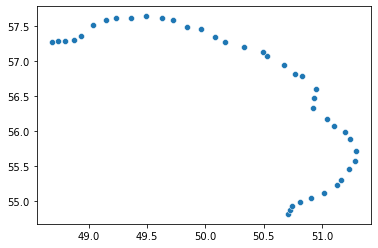

In [21]:
# plt.figure(figsize=(10,7))
sns.scatterplot(x=projections_tSNE.T[0], y=projections_tSNE.T[1], data=x)

# BiClustering

In [26]:
model = SpectralCoclustering(n_clusters=5, random_state=0)
model.fit(df)

SpectralCoclustering(n_clusters=5, random_state=0)

In [30]:
np.argsort(model.row_labels_)

array([ 64,  90,  89,  88,  87,  86,  85,  84,  83,  82,  81,  80,  79,
        92,  78,  75,  74,  73,  72,  71,  70,  69,  67,  65,  63,  62,
        61,  77,  60,  94,  96, 127, 126, 123, 122, 121, 120, 119, 118,
       117, 116, 115, 114,  95, 113, 111, 110, 109, 108, 107, 106, 105,
       104, 102, 100,  98,  97, 112,  59, 129,  57,  33,  31,  30,  58,
        28,  27,  26,  24,  23,  34,  22,  18,  16,  15,  14,  11,  10,
         9,   8,   1,  19,  36,  29,  44,  48,  46,  45,  38,  53,  43,
        49,  42,  56,  39,  54,   7,   4,  12,   3,  66,  68,  17,  51,
        20,   0, 103,  35, 101,  47,  76,  40,  21,  41,  32,   2,  52,
        93,   6, 125, 124,  91,  55, 128,  13,  25,  99,  50,   5,  37],
      dtype=int64)

In [31]:
np.argsort(model.column_labels_)

array([ 0, 30, 29, 19, 18, 32, 15, 14, 12, 10, 16, 33,  8,  7,  1,  5,  4,
       31, 27, 26, 25,  9, 22, 20, 13, 28, 23, 17,  2, 21, 24,  3,  6, 11],
      dtype=int64)

In [35]:
model

SpectralCoclustering(n_clusters=5, random_state=0)

In [33]:
fit_data = df[model.row_labels_]
fit_data = fit_data[:, model.column_labels_]

KeyError: "None of [Int64Index([1, 0, 3, 1, 1, 4, 3, 1, 0, 0,\n            ...\n            0, 0, 0, 0, 4, 4, 0, 0, 4, 0],\n           dtype='int64', length=130)] are in the [columns]"

In [34]:
plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("After biclustering")

plt.show()

NameError: name 'fit_data' is not defined